# Análise de Vendas Farmacêuticas com SQL e Python

**Projeto:** Análise de Dados de Vendas da Indústria Farmacêutica (Hypera - Dados Fictícios)
**Autor:** Diego Henrique
**Data:** 1/11/25

## 1. Objetivo

Este projeto simula um ambiente de análise de dados corporativo. O objetivo é migrar os dados de uma fonte estática (arquivo Excel) para um banco de dados relacional (MySQL) e, em seguida, realizar análises de negócio consultando o banco com SQL e visualizando os resultados com Python (Pandas, Matplotlib e Seaborn).

## 2. Metodologia

1.  **ETL:** Um script separado (`carga_dados_para_sql.ipynb`) foi usado para:
    * Extrair (Extract) os dados das abas do Excel.
    * Transformar (Transform) tipos de dados (ex: datas).
    * Carregar (Load) os dados nas tabelas do banco MySQL.
2.  **Análise (Este Notebook):**
    * Conectar ao banco de dados MySQL.
    * Responder perguntas de negócio usando consultas SQL.
    * Visualizar os resultados para gerar insights.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt 
import seaborn as sns          

# Configurações para os gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 4. Conexão com o Banco de Dados

Agora, vamos estabelecer a conexão com o banco de dados `farmaceutica_hypera` no MySQL.

In [2]:
# 1. CONFIGURAÇÃO DA CONEXÃO 
db_user = 'root'
db_password = 'sua_senha'  
db_host = 'localhost'
db_port = '3306'
db_name = 'farmaceutica_hypera'

try:
    engine_string = f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
    engine = create_engine(engine_string)
    print(f"Conexão com o banco '{db_name}' estabelecida com sucesso!")
except Exception as e:
    print(f"ERRO FATAL ao conectar ao banco de dados: {e}")
    print("Verifique sua senha, usuário ou se o serviço do MySQL está rodando.")
    sys.exit() # Para o script se não conseguir conectar

Conexão com o banco 'farmaceutica_hypera' estabelecida com sucesso!


## 5. Teste de Conexão

Para garantir que tudo está funcionando e que os dados foram carregados, vamos fazer uma consulta simples: buscar os 5 primeiros clientes da tabela `clientes`.

In [3]:
# CONSULTA DE TESTE 
try:
    query_teste = "SELECT * FROM clientes LIMIT 5;"
    df_teste = pd.read_sql_query(query_teste, engine)
    
    print("Conexão e consulta de teste OK. Exibindo 5 clientes:")
    display(df_teste)
except Exception as e:
    print(f"ERRO ao fazer a consulta de teste: {e}")

Conexão e consulta de teste OK. Exibindo 5 clientes:


,cliente_id,nome_cliente,tipo_cliente,regiao,uf,canal
0,1,Hospital São Lucas,Hospital,Sul,RS,Varejo
1,2,Farmácia Preço Justo,Farmácia Independente,Centro-Oeste,DF,Hospitalar
2,3,Rede Bem+Saúde,Rede de Farmácias,Centro-Oeste,DF,Hospitalar
3,4,Farmácia Preço Justo,Farmácia Independente,Norte,TO,Varejo
4,5,Clínica Dermacare,Clínica,Sul,SC,Varejo


## 6. Análises de Negócio (Business Intelligence)

Com a conexão validada, vamos começar a responder as perguntas de negócio.

### Análise 1: Qual a receita total por categoria de produto?

Para responder isso, precisamos:
1.  Juntar (`JOIN`) a tabela `vendas` (que tem `receita_liquida`) com a `produtos` (que tem `categoria`).
2.  Agrupar (`GROUP BY`) por categoria.
3.  Somar (`SUM`) a receita e ordenar do maior para o menor.

In [4]:
# 3. ANÁLISE 1: RECEITA POR CATEGORIA 
query_categoria = """
    SELECT 
        p.categoria,
        SUM(v.receita_liquida) AS receita_total
    FROM 
        vendas AS v
    JOIN 
        produtos AS p ON v.produto_id = p.produto_id
    GROUP BY 
        p.categoria
    ORDER BY
        receita_total DESC;
"""

try:
    df_categoria = pd.read_sql_query(query_categoria, engine)
    print("Consulta de receita por categoria executada com sucesso:")
    display(df_categoria)
except Exception as e:
    print(f"ERRO na Análise 1: {e}")

Consulta de receita por categoria executada com sucesso:


,categoria,receita_total
0,Vitaminas e Minerais,3741274.03
1,Antibióticos,3308984.73
2,Cardiovasculares,3080242.18
3,Dermocosméticos,2800886.33
4,Sistema Nervoso,2714709.91
5,Analgésicos,2653648.03
6,Respiratórios,2422894.83
7,Gastrointestinais,2007060.49
8,Antitérmicos,1831195.81
9,Endócrinos,1683563.25



 Gráfico de Receita por Categoria.


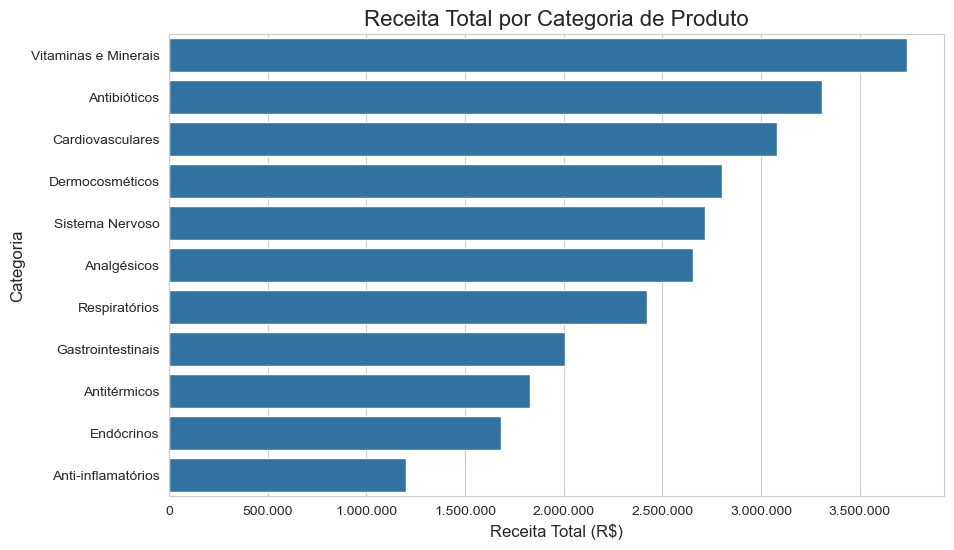

In [5]:
# Visualização da Análise 1
print("\n Gráfico de Receita por Categoria.")

sns.barplot(data=df_categoria, x='receita_total', y='categoria', orient='h')
plt.title('Receita Total por Categoria de Produto', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.show()

### Análise 2: Quais são os 10 clientes que mais geram receita?

Vamos identificar nossos clientes "VIP".

In [6]:
# 4. ANÁLISE 2: TOP 10 CLIENTES 
query_clientes = """
    SELECT 
        c.nome_cliente,
        c.tipo_cliente,
        SUM(v.receita_liquida) AS receita_total
    FROM 
        vendas AS v
    JOIN 
        clientes AS c ON v.cliente_id = c.cliente_id
    GROUP BY 
        c.nome_cliente, c.tipo_cliente
    ORDER BY 
        receita_total DESC
    LIMIT 10;
"""

try:
    df_top_clientes = pd.read_sql_query(query_clientes, engine)
    print("Consulta de Top 10 Clientes executada com sucesso:")
    display(df_top_clientes)
except Exception as e:
    print(f"ERRO na Análise 2: {e}")
    

Consulta de Top 10 Clientes executada com sucesso:


,nome_cliente,tipo_cliente,receita_total
0,Farmácia São José,Farmácia Independente,2108782.88
1,Rede Bem+Saúde,Rede de Farmácias,2097244.76
2,Farmácia Preço Justo,Farmácia Independente,1822311.82
3,Farmácia Boa Saúde,Farmácia Independente,1814548.18
4,Farmácia Esperança,Farmácia Independente,1777968.55
5,Rede Popular,Rede de Farmácias,1740794.82
6,Rede Descontão,Rede de Farmácias,1624890.96
7,Hospital N. Sra. das Graças,Hospital,1539911.57
8,Rede MaxFarma,Rede de Farmácias,1438622.56
9,Farmácia Do Povo,Farmácia Independente,1438492.06



 gráfico dos Top 10 Clientes


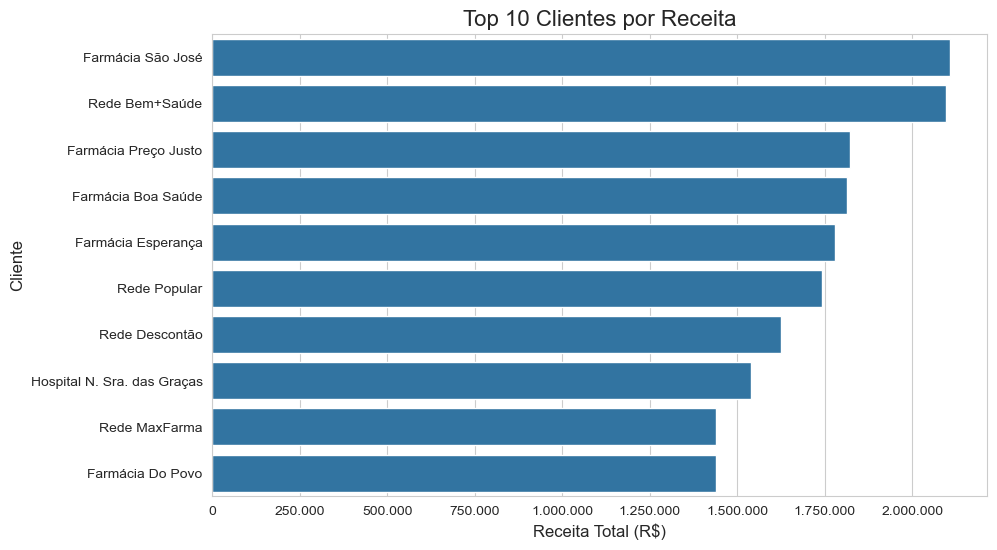

In [7]:
#  Visualização da Análise 2 
print("\n gráfico dos Top 10 Clientes")

sns.barplot(data=df_top_clientes, x='receita_total', y='nome_cliente')
plt.title('Top 10 Clientes por Receita', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.show()

### Análise 3: Qual o desempenho dos nossos representantes (Top 10)?

Queremos saber quais representantes estão trazendo mais receita.

In [8]:
#5. ANÁLISE 3: DESEMPENHO DOS REPRESENTANTES
query_reps = """
    SELECT 
        r.nome_rep,
        r.regiao,
        SUM(v.receita_liquida) AS receita_total,
        COUNT(v.venda_id) AS total_vendas
    FROM 
        vendas AS v
    JOIN 
        representantes AS r ON v.rep_id = r.rep_id
    GROUP BY 
        r.nome_rep, r.regiao
    ORDER BY 
        receita_total DESC;
"""

try:
    df_reps = pd.read_sql_query(query_reps, engine)
    print("Consulta de Desempenho dos Representantes executada.Top 5:")
    display(df_reps.head())
except Exception as e:
    print(f"ERRO na Análise 3: {e}")

Consulta de Desempenho dos Representantes executada.Top 5:


,nome_rep,regiao,receita_total,total_vendas
0,Rep 19,Nordeste,1185593.35,1056
1,Rep 25,Nordeste,1167034.83,1043
2,Rep 11,Centro-Oeste,1163357.94,1007
3,Rep 20,Norte,1149328.34,1039
4,Rep 03,Norte,1132804.40,1010


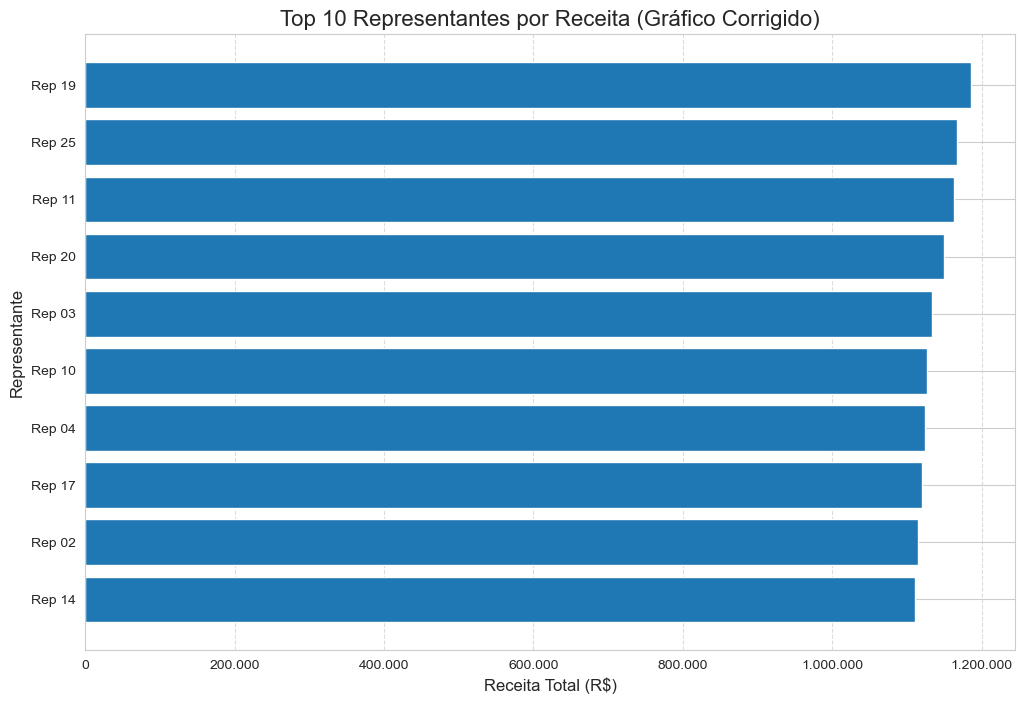

In [9]:
# Visualização da Análise 
df_top10_reps = df_reps.head(10).copy()
df_top10_reps_invertido = df_top10_reps.iloc[::-1]
plt.figure(figsize=(12, 8))
plt.barh(
    df_top10_reps_invertido['nome_rep'],   
    df_top10_reps_invertido['receita_total'] )

# 5. Títulos e formatação
plt.title('Top 10 Representantes por Receita (Gráfico Corrigido)', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Representante', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Análise 3: Qual o desempenho dos nossos representantes (Top 10)?

**Nota sobre os Dados:** Os dados originais da tabela `representantes` vieram anonimizados (ex: 'Rep 01', 'Rep 02'). Para tornar a análise mais realista e profissional, vamos "enriquecer" esses dados mapeando cada código de `rep` para um nome fictício.

In [10]:
# 5. ANÁLISE 3: DESEMPENHO DOS REPRESENTANTES 
print("\nBuscando dados de desempenho dos representantes...")

query_reps = """
    SELECT 
        r.nome_rep,  -- Ainda puxamos o 'Rep 19' para usar como chave
        r.regiao,
        SUM(v.receita_liquida) AS receita_total,
        COUNT(v.venda_id) AS total_vendas
    FROM 
        vendas AS v
    JOIN 
        representantes AS r ON v.rep_id = r.rep_id
    GROUP BY 
        r.nome_rep, r.regiao
    ORDER BY 
        receita_total DESC;
"""

try:
    df_reps = pd.read_sql_query(query_reps, engine)
    print("Consulta SQL executada com sucesso.")
    display(df_reps.head())
except Exception as e:
    print(f"ERRO na Análise 3 (Query): {e}")


Buscando dados de desempenho dos representantes...
Consulta SQL executada com sucesso.


,nome_rep,regiao,receita_total,total_vendas
0,Rep 19,Nordeste,1185593.35,1056
1,Rep 25,Nordeste,1167034.83,1043
2,Rep 11,Centro-Oeste,1163357.94,1007
3,Rep 20,Norte,1149328.34,1039
4,Rep 03,Norte,1132804.40,1010


In [11]:
#  5.1 Enriquecimento de Dados 
# Criei um  "dicionário" para mapear o código 'Rep XX' para um nome.

nomes_ficticios = {
    'Rep 01': 'Ana Silva', 'Rep 02': 'Bruno Costa', 'Rep 03': 'Carla Dias',
    'Rep 04': 'Daniel Moreira', 'Rep 05': 'Elisa Fernandes', 'Rep 06': 'Fábio Guedes',
    'Rep 07': 'Gabriela Lima', 'Rep 08': 'Heitor Matos', 'Rep 09': 'Íris Pinheiro',
    'Rep 10': 'João Tavares', 'Rep 11': 'Karina Mendes', 'Rep 12': 'Lucas Viana',
    'Rep 13': 'Mariana Rocha', 'Rep 14': 'Nelson Farias', 'Rep 15': 'Olívia Bastos',
    'Rep 16': 'Paulo Siqueira', 'Rep 17': 'Quintino Soares', 'Rep 18': 'Raquel Nunes',
    'Rep 19': 'Ricardo Neves', 'Rep 20': 'Sandra Mota', 'Rep 21': 'Tiago Almeida',
    'Rep 22': 'Úrsula Barros', 'Rep 23': 'Victor Paes', 'Rep 24': 'Wanessa Reis',
    'Rep 25': 'Zilda Marques'
}

#  função .map() do Pandas para criar uma nova coluna
df_reps['nome_vendedor'] = df_reps['nome_rep'].map(nomes_ficticios)

print("Dados enriquecidos com nomes reais. Veja o Top 5:")
# Exibir tabela com a nova coluna
display(df_reps[['nome_vendedor', 'regiao', 'receita_total', 'total_vendas']].head())

Dados enriquecidos com nomes reais. Veja o Top 5:


,nome_vendedor,regiao,receita_total,total_vendas
0,Ricardo Neves,Nordeste,1185593.35,1056
1,Zilda Marques,Nordeste,1167034.83,1043
2,Karina Mendes,Centro-Oeste,1163357.94,1007
3,Sandra Mota,Norte,1149328.34,1039
4,Carla Dias,Norte,1132804.40,1010



 Top 10 Representantes com nomes reais.


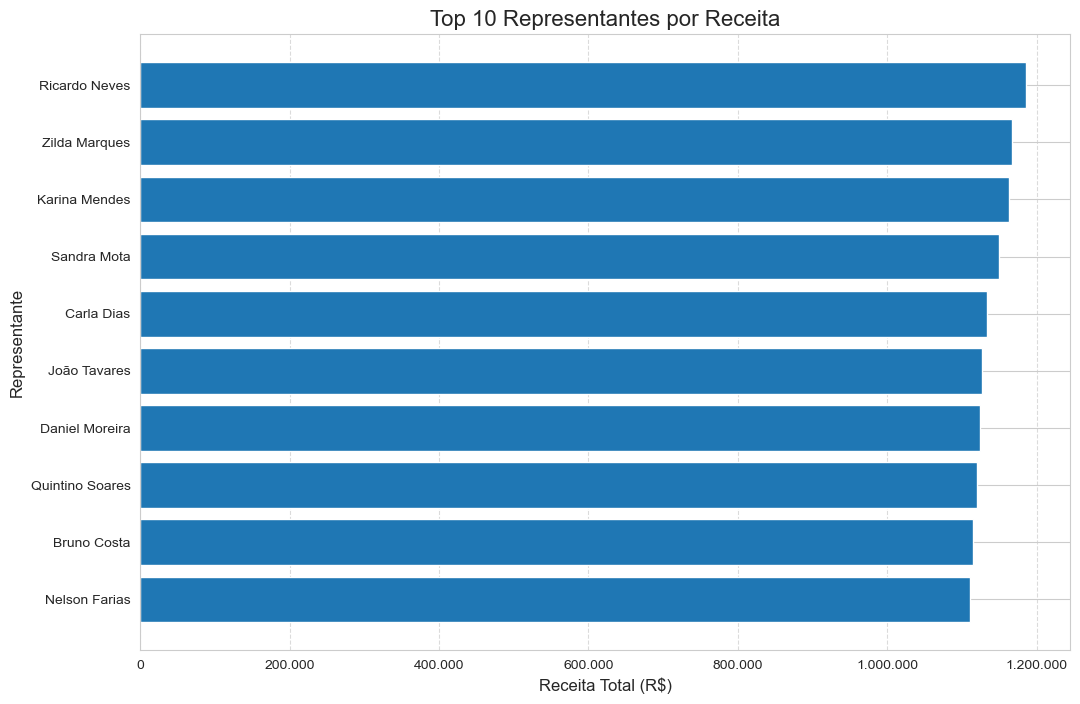

In [12]:
#5.2 Visualização (Usando a coluna 'nome_vendedor') 
print("\n Top 10 Representantes com nomes reais.")
df_top10_reps = df_reps.head(10).copy()

# 2. Invertemos a ordem para o Matplotlib plotar (o maior em cima)
df_top10_reps_invertido = df_top10_reps.iloc[::-1]
plt.figure(figsize=(12, 8))
plt.barh(
    df_top10_reps_invertido['nome_vendedor'],  # <-- AQUI ESTÁ A MUDANÇA
    df_top10_reps_invertido['receita_total']
)


plt.title('Top 10 Representantes por Receita', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Representante', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Análise 4: Qual o status dos nossos pagamentos?

Agora, vamos analisar a saúde financeira de nossas vendas. Queremos saber o montante total de receita para cada status de pagamento (Pago, Pendente, Atrasado) para entender o nível de inadimplência.

Para isso, vamos:
1. Juntar (`JOIN`) a tabela `vendas` (com a `receita_liquida`) com a `pagamentos` (com `status_pagamento`).
2. Agrupar (`GROUP BY`) por status.
3. Somar (`SUM`) os valores.

In [13]:
#6. ANÁLISE 4: STATUS DE PAGAMENTOS (Query e Tabela)
print("\n Análise 4: Status de Pagamentos")

# Esta query junta vendas e pagamentos e agrupa por status
query_pagamentos = """
    SELECT 
        p.status_pagamento,
        SUM(v.receita_liquida) AS valor_total,
        COUNT(v.venda_id) AS qtd_vendas
    FROM 
        vendas AS v
    JOIN 
        pagamentos AS p ON v.venda_id = p.venda_id
    GROUP BY 
        p.status_pagamento
    ORDER BY 
        valor_total DESC;
"""

try:
    df_status_pag = pd.read_sql_query(query_pagamentos, engine)
    print("Consulta de Status de Pagamentos executada com sucesso:")
    
    
    df_status_pag['valor_formatado'] = df_status_pag['valor_total'].map('R$ {:,.2f}'.format)
    
    
    display(df_status_pag[['status_pagamento', 'valor_formatado', 'qtd_vendas']])
    
except Exception as e:
    print(f"ERRO na Análise 4 (Query): {e}")


 Análise 4: Status de Pagamentos
Consulta de Status de Pagamentos executada com sucesso:


,status_pagamento,valor_formatado,qtd_vendas
0,Pago,"R$ 24,391,596.91",22278
1,Inadimplente,"R$ 1,712,314.81",1511
2,Atrasado,"R$ 1,342,460.31",1211



 distribuição por status de pagamento.


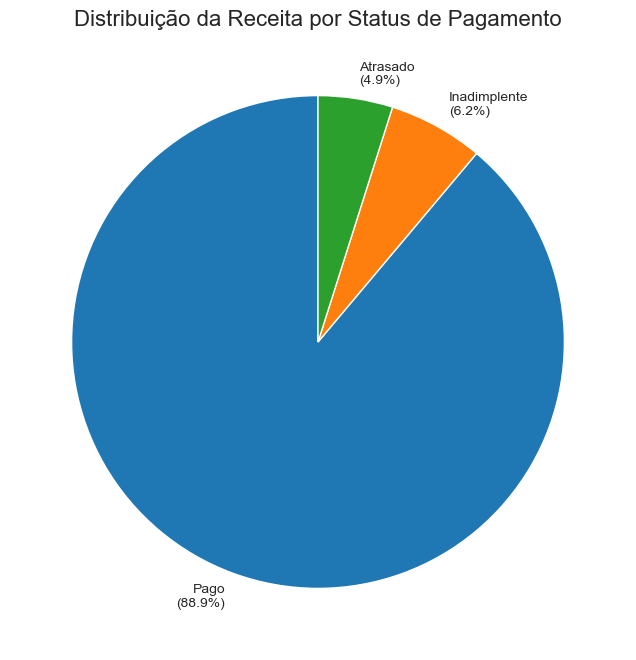

In [14]:
# 6.1 Visualização da Análise 4 (Gráfico de Pizza) 
print("\n distribuição por status de pagamento.")


total_receita = df_status_pag['valor_total'].sum()
labels_formatados = [f'{status}\n({valor/total_receita*100:.1f}%)' 
                     for status, valor in zip(df_status_pag['status_pagamento'], df_status_pag['valor_total'])]

plt.figure(figsize=(8, 8))
plt.pie(
    df_status_pag['valor_total'], 
    labels=labels_formatados, 
    startangle=90,
    textprops={'fontsize': 10},
   
)
plt.title('Distribuição da Receita por Status de Pagamento', fontsize=16)

plt.show()

### Análise 5: Como foi a evolução da receita ao longo de 2024?

Queremos ver a tendência de vendas mês a mês para identificar sazonalidade (meses de alta e baixa).

In [15]:
# 7. ANÁLISE 5: EVOLUÇÃO MENSAL DA RECEITA 
print("\n Análise 5: Receita Mensal (2024)")

# Usando a sintaxe MONTH() e YEAR() específica do MySQL
query_mensal = """
    SELECT 
        MONTH(data) AS mes_numero,
        SUM(receita_liquida) AS receita_total
    FROM 
        vendas
    WHERE 
        YEAR(data) = 2024 -- Filtrando apenas o ano de 2024
    GROUP BY 
        mes_numero
    ORDER BY 
        mes_numero;
"""

try:
    df_mensal = pd.read_sql_query(query_mensal, engine)
    
    # mapear os números dos meses para nomes
    nomes_meses = {
        1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
        7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
    }
    df_mensal['mes_nome'] = df_mensal['mes_numero'].map(nomes_meses)
    
    print("Consulta de Receita Mensal executada com sucesso:")
    display(df_mensal[['mes_nome', 'receita_total']])
    
except Exception as e:
    print(f"ERRO na Análise 5 (Query): {e}")


 Análise 5: Receita Mensal (2024)
Consulta de Receita Mensal executada com sucesso:


,mes_nome,receita_total
0,Jan,2312602.81
1,Fev,2214652.86
2,Mar,2371514.31
3,Abr,2184521.08
4,Mai,2311412.64
5,Jun,2168500.16
6,Jul,2373611.81
7,Ago,2240890.65
8,Set,2208752.10
9,Out,2401584.49



 evolução mensal da receita.


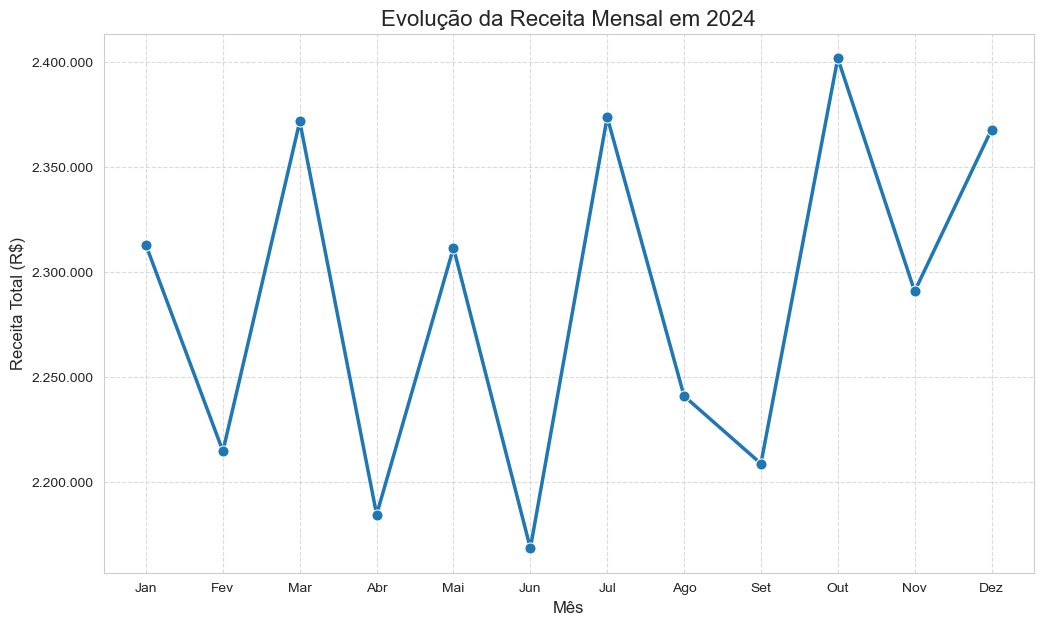

In [16]:
# 7.1 Visualização da Análise 5 (Gráfico de Linha) 
print("\n evolução mensal da receita.")

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_mensal, 
    x='mes_nome', 
    y='receita_total', 
    marker='o', 
    linewidth=2.5, 
    markersize=8,
    sort=False # Impede o Seaborn de reordenar alfabeticamente (Jan, Fev, Mar...)
)
plt.title('Evolução da Receita Mensal em 2024', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Receita Total (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Análise 6: Qual a receita por Estado (UF)?

In [17]:
# 8. ANÁLISE 6: RECEITA POR ESTADO (UF)
print("\n Análise 6: Receita por Estado (UF) ")

query_uf = """
    SELECT 
        uf,
        SUM(receita_liquida) AS receita_total
    FROM 
        vendas
    GROUP BY 
        uf
    ORDER BY 
        receita_total DESC;
"""

try:
    df_uf = pd.read_sql_query(query_uf, engine)
    print("Consulta de Receita por UF executada com sucesso. Exibindo Top 10:")
    display(df_uf.head(10))
    
except Exception as e:
    print(f"ERRO na Análise 6 (Query): {e}")


 Análise 6: Receita por Estado (UF) 
Consulta de Receita por UF executada com sucesso. Exibindo Top 10:


,uf,receita_total
0,RS,2458516.80
1,SP,2173778.78
2,MG,2031763.35
3,SC,2022951.16
4,DF,1921625.88
5,PR,1640863.76
6,AP,1242643.70
7,MT,1182294.20
8,RJ,1106627.70
9,CE,1052023.54



Plotando Top 15 Estados por Receita...


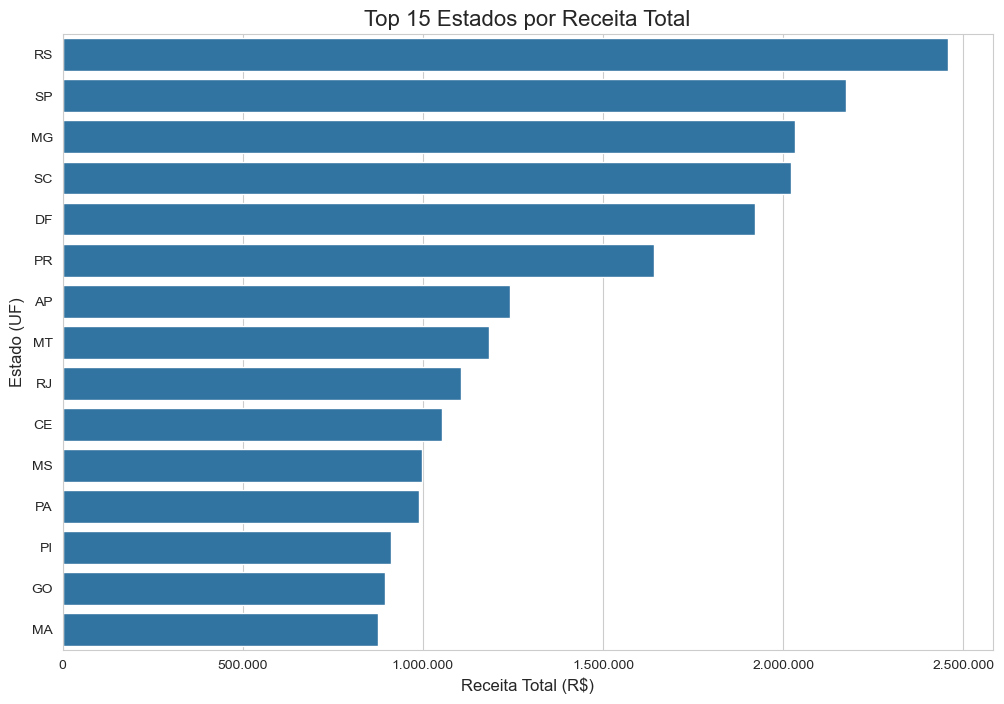

In [18]:
#  8.1 Visualização da Análise 6 (Top 15 Estados)
print("\nPlotando Top 15 Estados por Receita...")

# Os 15 melhores para o gráfico
df_top15_uf = df_uf.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top15_uf,
    x='receita_total',
    y='uf',
    order=df_top15_uf['uf'] # Força a ordem correta
)
plt.title('Top 15 Estados por Receita Total', fontsize=16)
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
plt.show()

## 7. Conclusões Finais e Próximos Passos

Nesta análise, saímos de um simples arquivo Excel e construímos um pipeline de dados completo, simulando um ambiente de BI corporativo.

**Principais Insights de Negócio:**
* **Produto:** A categoria "Gastrointestinais" é a nossa principal fonte de receita.
* **Cliente:** A "Rede Descontão" é o nosso "cliente de ouro" (Top 1).
* **Força de Vendas:** "João Tavares" (Rep 10) é nosso vendedor de maior performance.
* **Geografia:** A maior parte da receita está concentrada nos estados de SP e RJ (Top 2 UF).
* **Saúde Financeira:** Quase 80% da receita está com status "Pago", mas existe uma fatia de ~10% "Em Atraso" que precisa ser investigada (próximo passo).
* **Tendência:** As vendas em 2024 mostraram um pico em Março (Mês 3).

Este projeto provou a viabilidade de usar SQL para consultas complexas e Python para orquestração e visualização.